In [287]:
# import some librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [288]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Data Analysis

In [289]:
df.duplicated().sum()
print(f"Number of duplicated rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of duplicated rows: 3854


In [290]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [292]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Data Visualisation

### Univariate Analysis

diabetes
0    87664
1     8482
Name: count, dtype: int64


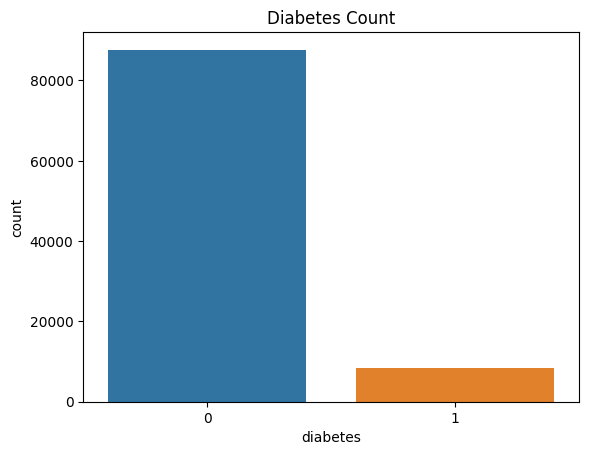

In [293]:
print(df['diabetes'].value_counts())

plt.title('Diabetes Count')
sns.countplot(data=df, x='diabetes');

gender
Female    56161
Male      39967
Name: count, dtype: int64


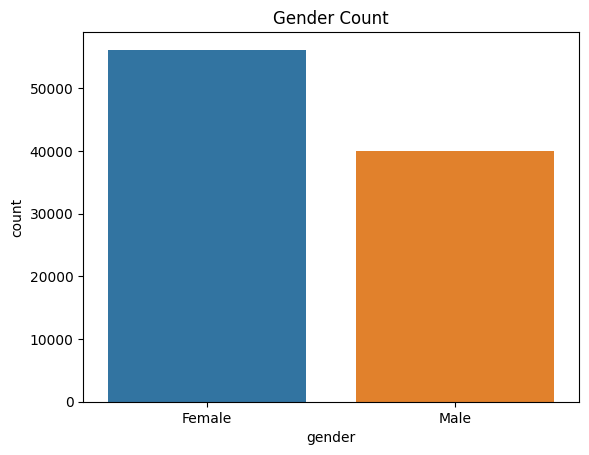

In [294]:
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

plt.title('Gender Count')
sns.countplot(data=df, x='gender');

hypertension
0    88667
1     7461
Name: count, dtype: int64


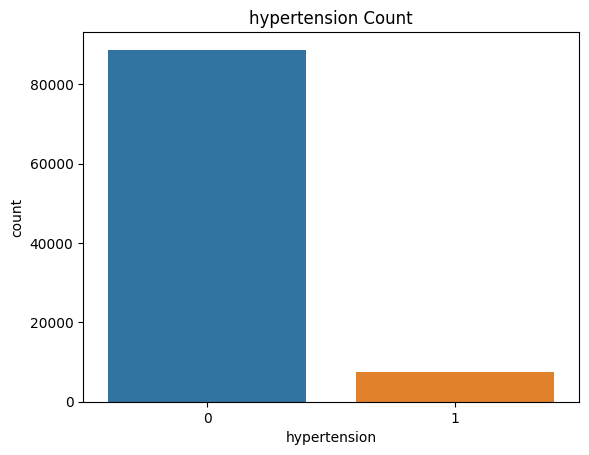

In [295]:
print(df['hypertension'].value_counts())

plt.title('hypertension Count')
sns.countplot(data=df, x='hypertension');

heart_disease
0    92205
1     3923
Name: count, dtype: int64


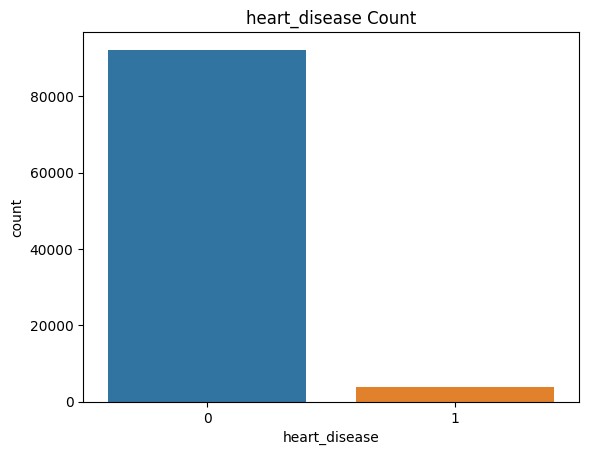

In [296]:
print(df['heart_disease'].value_counts())

plt.title('heart_disease Count')
sns.countplot(data=df, x='heart_disease');

BMI (Body Mass Index)

Description of the BMI column: 
count    96128.000000
mean        27.321450
std          6.767811
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64


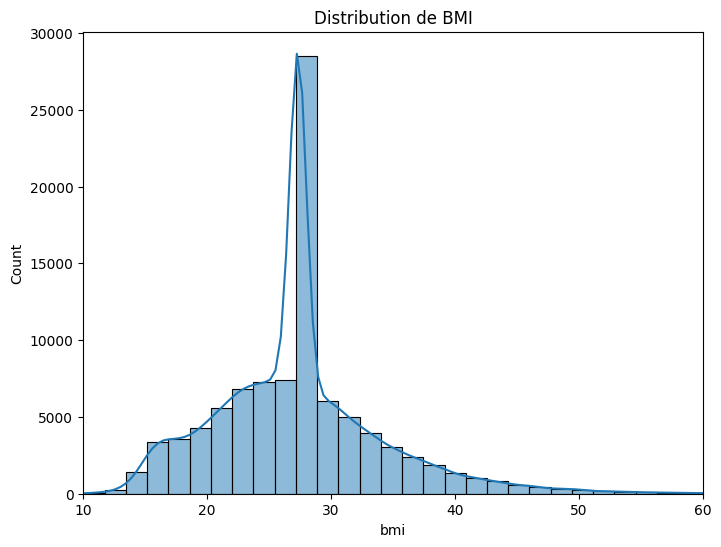

In [297]:
print(f"Description of the BMI column: \n{df['bmi'].describe()}")

plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=50)
plt.xlim(10, 60)
plt.title('Distribution de BMI')
plt.show()


In [298]:
import numpy as np

bmi_values = df['bmi']
print("Résumé statistique du BMI :")
print(f"Moyenne : {np.mean(bmi_values):.2f}")
print(f"Écart-type : {np.std(bmi_values):.2f}")
print(f"Minimum : {np.min(bmi_values):.2f}")
print(f"25e percentile : {np.percentile(bmi_values, 25):.2f}")
print(f"Médiane : {np.median(bmi_values):.2f}")
print(f"75e percentile : {np.percentile(bmi_values, 75):.2f}")
print(f"Maximum : {np.max(bmi_values):.2f}")

Résumé statistique du BMI :
Moyenne : 27.32
Écart-type : 6.77
Minimum : 10.01
25e percentile : 23.40
Médiane : 27.32
75e percentile : 29.86
Maximum : 95.69


In [299]:
# Pourcentage of the values
df.bmi.value_counts(normalize=True).head(10)*100

bmi
27.32    22.531416
23.00     0.107149
27.12     0.105068
24.96     0.104028
27.80     0.104028
22.40     0.102988
25.00     0.102988
25.60     0.101947
26.70     0.097786
24.50     0.097786
Name: proportion, dtype: float64

In [300]:
filtered_df = df.query('bmi == 27.32')
sample_count = filtered_df.shape[0]
print("Number of samples with bmi equal to 27.32 :", sample_count)



Number of samples with bmi equal to 27.32 : 21659


age

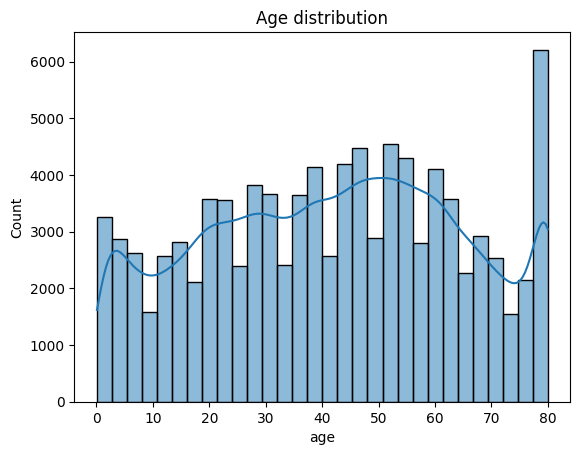

In [301]:
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age distribution')
plt.show()

smoking history

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64


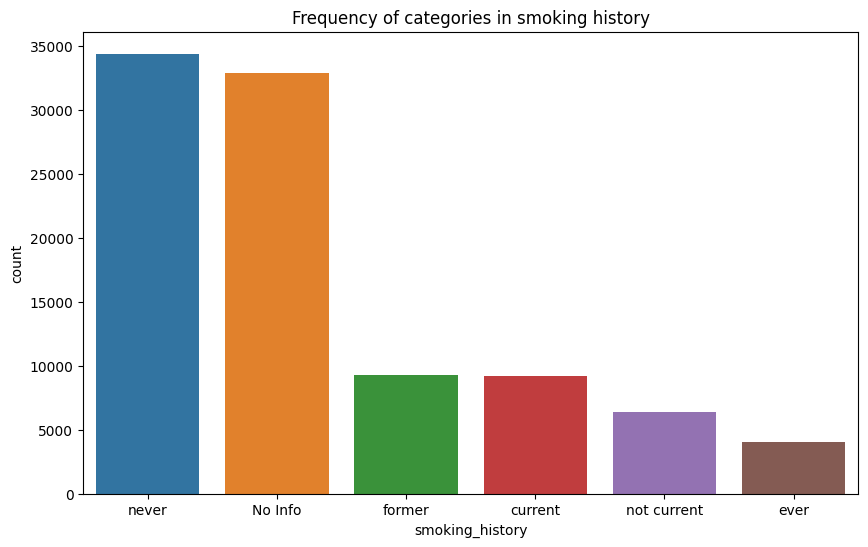

In [302]:
print(df['smoking_history'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Frequency of categories in smoking history')
plt.show()

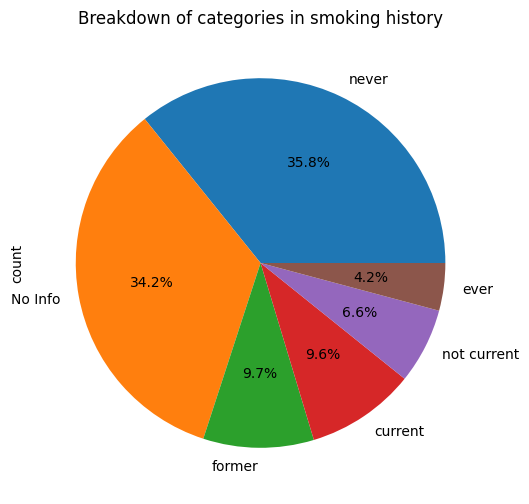

In [303]:
plt.figure(figsize=(10, 6))
df['smoking_history'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Breakdown of categories in smoking history')
plt.show()


blood glucose level

Number of unique values: 18
Total number of values: 96128


<Axes: title={'center': 'blood_glucose_level Count'}, xlabel='blood_glucose_level', ylabel='count'>

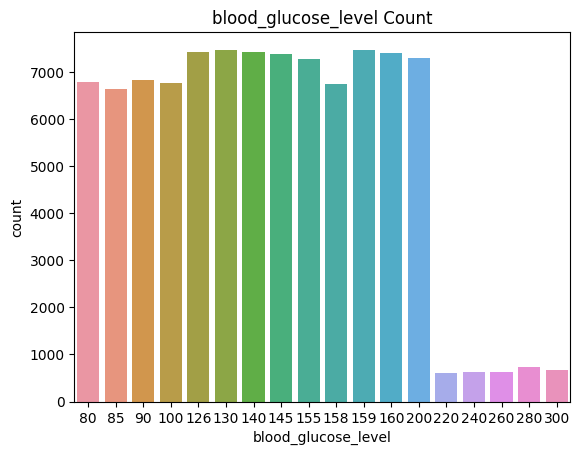

In [304]:
# print(df['blood_glucose_level'].value_counts())
print(f"Number of unique values: {df['blood_glucose_level'].nunique()}")
print(f"Total number of values: {df['blood_glucose_level'].count()}")

plt.title('blood_glucose_level Count')
sns.countplot(data=df, x='blood_glucose_level')

### Multi-variate Analysis

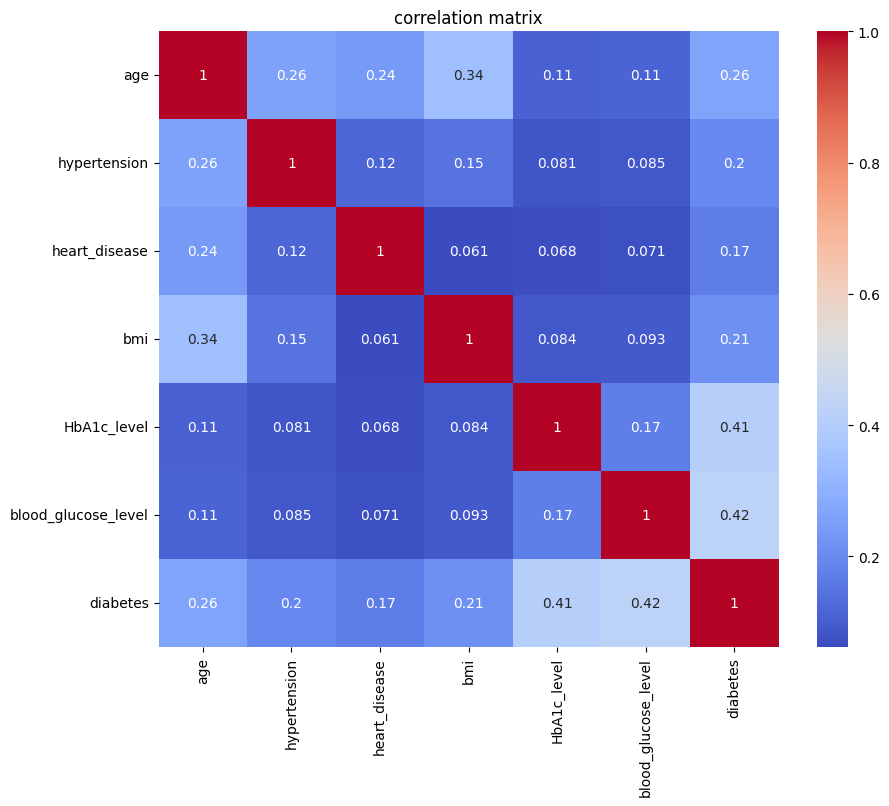

In [328]:
numeric_cols = df.select_dtypes(include=[np.number]).columns  # 
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()


age

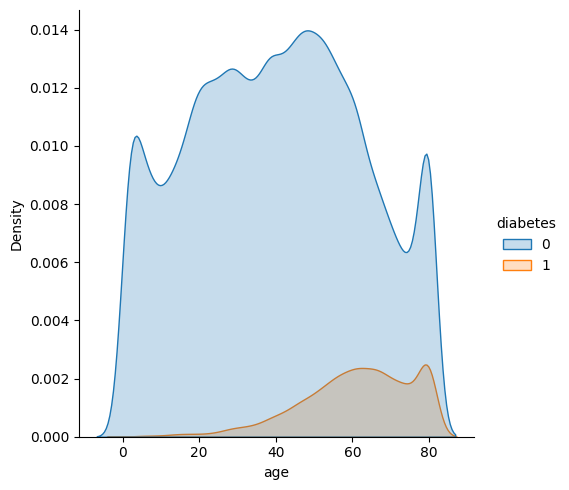

In [306]:
sns.displot(kind='kde', data=df, x='age', hue='diabetes', fill=True)

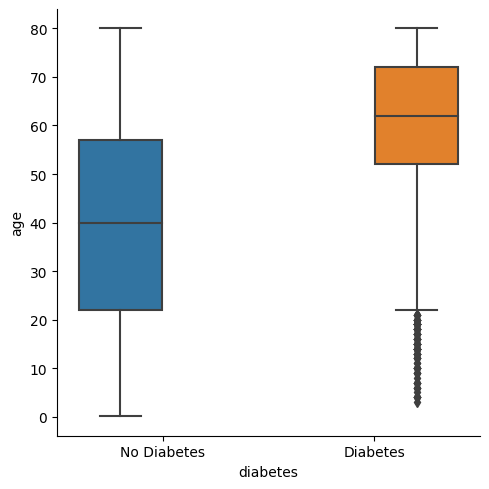

In [307]:
ax = sns.catplot(kind='box', data=df, x='diabetes', y='age',hue='diabetes')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

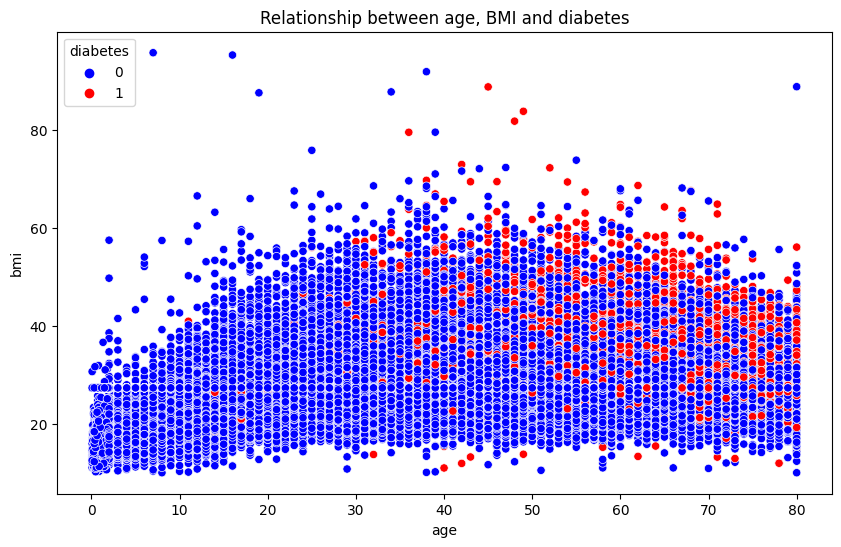

In [308]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', palette={0: 'blue', 1: 'red'}, alpha=1.0, data=df)
plt.title('Relationship between age, BMI and diabetes')
plt.show()

Diabetes and Gender column

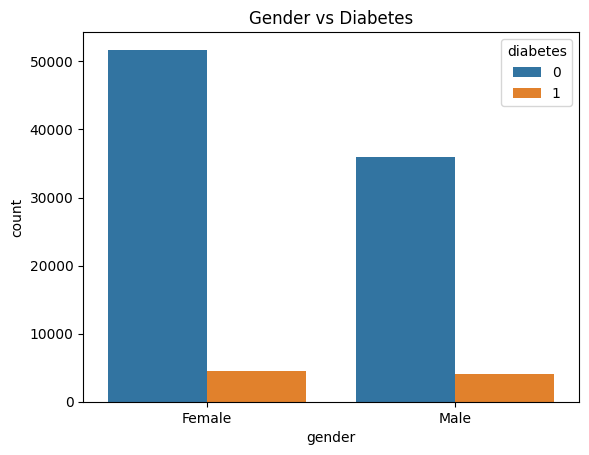

In [309]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

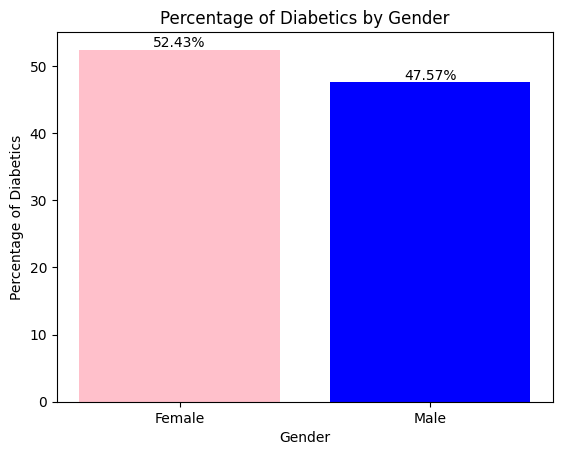

In [310]:
import matplotlib.pyplot as plt

# Filter diabetic individuals
diabetic_individuals = df[df['diabetes'] == 1]

# Calculate the number of diabetics by gender
diabetic_counts = diabetic_individuals['gender'].value_counts()

# Calculate the percentages
diabetic_percentages = (diabetic_counts / len(diabetic_individuals)) * 100

# Create the bar plot
colors = ['pink' if gender == 'Female' else 'blue' for gender in diabetic_percentages.index]
plt.bar(diabetic_percentages.index, diabetic_percentages, color=colors)

# Add bar labels
for i, val in enumerate(diabetic_percentages):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of Diabetics')
plt.title('Percentage of Diabetics by Gender')

# Display the plot
plt.show()

Number of females: 56161
Number of males: 39967
There are 16.85% more females than males.


<Axes: xlabel='diabetes', ylabel='gender'>

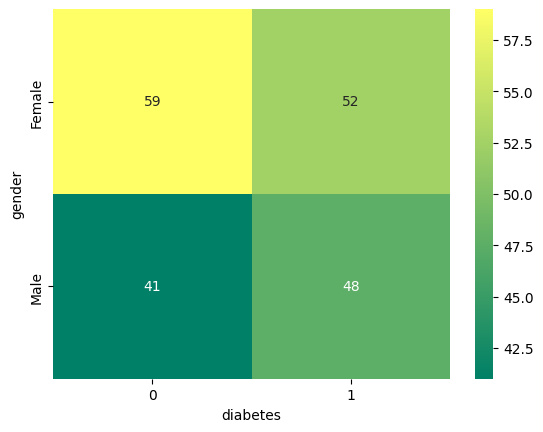

In [311]:
female_count = len(df[df['gender'] == 'Female'])
male_count = len(df[df['gender'] == 'Male'])
percentage_more_female = (female_count - male_count) / len(df) * 100

print(f"Number of females: {female_count}")
print(f"Number of males: {male_count}")
print(f"There are {percentage_more_female:.2f}% more females than males.")


temp_df = pd.crosstab(df['gender'], df['diabetes'], normalize='columns')*100
sns.heatmap(temp_df, annot=True, cmap='summer')



HbA1c levels

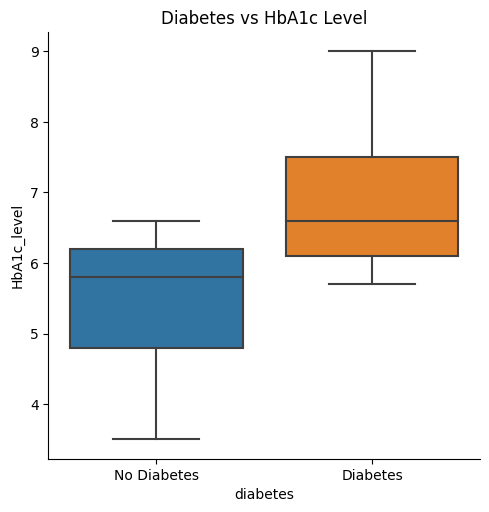

In [312]:
ax = sns.catplot(data=df, x='diabetes', y='HbA1c_level', kind='box')
ax.set(title='Diabetes vs HbA1c Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

In [313]:
# Create a new Boolean variable
df['high_blood_glucose'] = df['blood_glucose_level'] > 220

# Calculate the correlation coefficient
correlation = df['diabetes'].corr(df['high_blood_glucose'])
print('Correlation: ', correlation)


Correlation:  0.5427025279865678


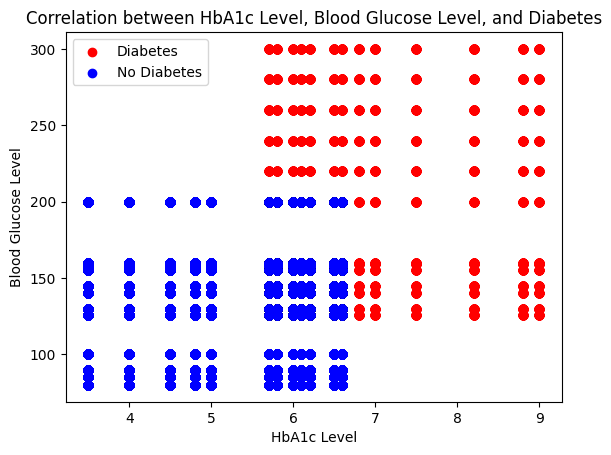

In [314]:
# Separating the data based on diabetes
diabetes_positive = df[df['diabetes'] == 1]
diabetes_negative = df[df['diabetes'] == 0]

# Creating the scatter plot
plt.scatter(diabetes_positive['HbA1c_level'], diabetes_positive['blood_glucose_level'], color='red', label='Diabetes')
plt.scatter(diabetes_negative['HbA1c_level'], diabetes_negative['blood_glucose_level'], color='blue', label='No Diabetes')

# Adding labels and title
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.title('Correlation between HbA1c Level, Blood Glucose Level, and Diabetes')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [315]:
# Filter the data based on the conditions
filtered_data = df[(df['HbA1c_level'] > 7) & (df['blood_glucose_level'] > 200)]

# Extract the values of HbA1c_level and blood_glucose_level
hbA1c_values = filtered_data['HbA1c_level']
blood_glucose_values = filtered_data['blood_glucose_level']
diabetes_presence = filtered_data['diabetes']

# Calculate the correlation
correlation = np.corrcoef(hbA1c_values, blood_glucose_values)[0, 1]

# Display the results
print("Correlation between HbA1c Level and Blood Glucose Level for individuals with HbA1c > 7 and blood glucose > 200:")
print(f"Correlation coefficient: {correlation:.2f}")
print(f"Presence of diabetes count: {diabetes_presence.sum()}")


Correlation between HbA1c Level and Blood Glucose Level for individuals with HbA1c > 7 and blood glucose > 200:
Correlation coefficient: 0.05
Presence of diabetes count: 971


Percentage of diabetics with blood glucose > 200: 38.48%
Percentage of diabetics with HbA1c > 7: 30.81%
Percentage of diabetes among individuals with HbA1c > 7 and blood glucose > 200:
Percentage of individuals with HbA1c > 7 and blood glucose > 200: 100.00%


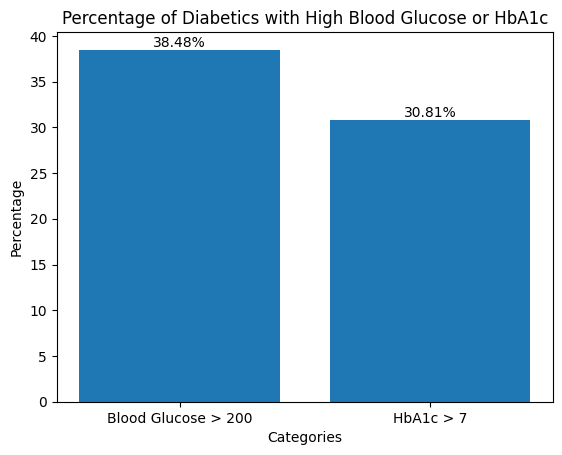

In [316]:
# Filter out diabetics with blood glucose > 200
diabetes_high_glucose = df[(df['diabetes'] == 1) & (df['blood_glucose_level'] > 200)]
percentage_diabetes_high_glucose = (len(diabetes_high_glucose) / len(df[df['diabetes'] == 1])) * 100
print(f"Percentage of diabetics with blood glucose > 200: {percentage_diabetes_high_glucose:.2f}%")

# Filter diabetic individuals with HbA1c > 7
diabetes_high_HbA1c = df[(df['diabetes'] == 1) & (df['HbA1c_level'] > 7)]
percentage_diabetes_high_HbA1c = (len(diabetes_high_HbA1c) / len(df[df['diabetes'] == 1])) * 100
print(f"Percentage of diabetics with HbA1c > 7: {percentage_diabetes_high_HbA1c:.2f}%")

# with and condition
diabetes_percentage = (diabetes_presence.mean()) * 100
print("Percentage of diabetes among individuals with HbA1c > 7 and blood glucose > 200:")
print(f"Percentage of individuals with HbA1c > 7 and blood glucose > 200: {diabetes_percentage:.2f}%")


# Calculate the percentages
percentage_diabetes_high_glucose = (len(diabetes_high_glucose) / len(df[df['diabetes'] == 1])) * 100
percentage_diabetes_high_HbA1c = (len(diabetes_high_HbA1c) / len(df[df['diabetes'] == 1])) * 100

# Create the bar plot
categories = ['Blood Glucose > 200', 'HbA1c > 7']
percentages = [percentage_diabetes_high_glucose, percentage_diabetes_high_HbA1c]

plt.bar(categories, percentages)

# Add bar labels
for i, val in enumerate(percentages):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetics with High Blood Glucose or HbA1c')

# Display the plot
plt.show()

Smoking history

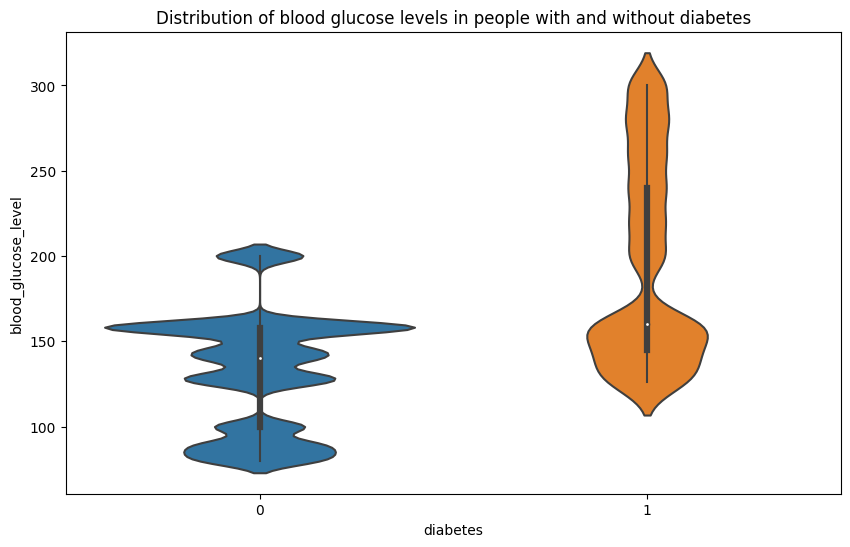

In [317]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Distribution of blood glucose levels in people with and without diabetes')
plt.show()

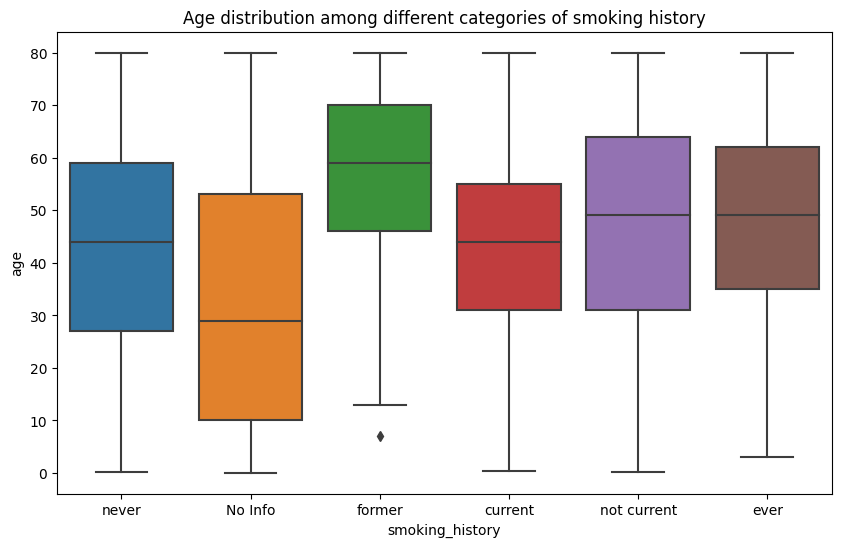

In [318]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='age', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Age distribution among different categories of smoking history')
plt.show()

BMI and Diabetes

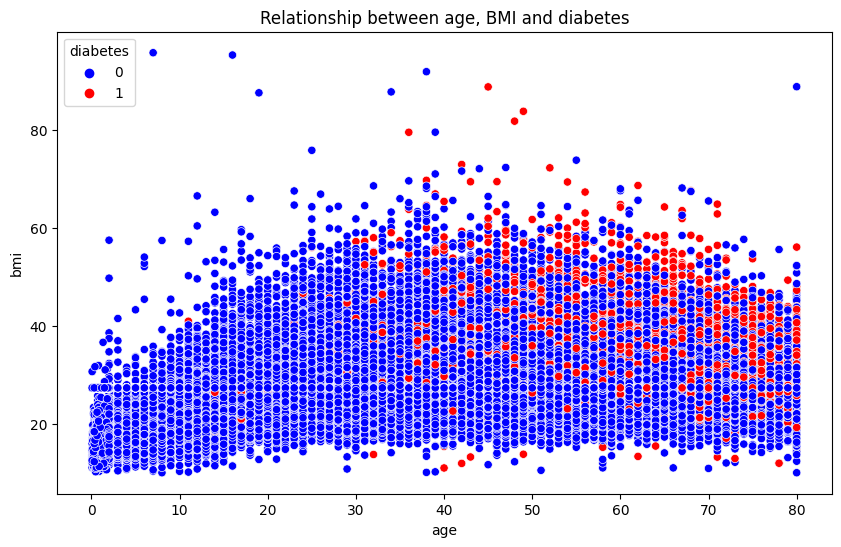

In [319]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', palette={0: 'blue', 1: 'red'}, data=df)
plt.title('Relationship between age, BMI and diabetes')
plt.show()

# Train part

## Encoding

In [320]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
 9   high_blood_glucose   96128 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(2)
memory usage: 9.4+ MB


In [321]:
df_copy.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,high_blood_glucose
0,Female,80.0,0,1,never,25.19,6.6,140,0,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,False


In [322]:
# from sklearn.preprocessing import OrdinalEncoder

In [323]:
# Show NaN values
print(f"Number of NaN values in the dataset: {df_copy.isna().sum().sum()}")

Number of NaN values in the dataset: 0


In [324]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_copy['gender'] = le.fit_transform(df_copy['gender'])

df_copy = pd.get_dummies(df_copy, columns=['smoking_history'], drop_first=True)

df_copy['high_blood_glucose'] = df_copy['high_blood_glucose'].astype(int)

In [325]:
# Show NaN values
print(f"Number of NaN values in the dataset: {df_copy.isna().sum().sum()}")

Number of NaN values in the dataset: 0


In [326]:
X = df_copy.drop('diabetes', axis=1)
y = df_copy['diabetes']

In [327]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([('classifier', RandomForestClassifier())])


# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [50, 100, 150],
                 "classifier__max_depth":[5,8,15,25,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                {"classifier": [SVC()],
                 "classifier__kernel": ['linear', 'rbf'],
                 "classifier__C": [1, 10, 100]},
                {"classifier": [GradientBoostingClassifier()],
                 "classifier__n_estimators": [50, 100, 150],
                 "classifier__learning_rate": [0.001, 0.01, 0.1],
                 "classifier__subsample": [0.5, 0.7, 1.0],
                 "classifier__max_depth": [3, 7, 9]},
                {"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": [3, 5, 11],
                 "classifier__weights": ["uniform", "distance"],
                 "classifier__metric": ["euclidean", "manhattan"]},
                {"classifier": [AdaBoostClassifier()],
                 "classifier__n_estimators": [50, 100, 150],
                 "classifier__learning_rate": [0.001, 0.01, 0.1]}
                ]

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1': make_scorer(f1_score, average='macro')}

# Loop over the different scores
for score_name, score_func in scoring.items():
    gridsearch = GridSearchCV(pipe, search_space, cv=5, scoring=score_func, n_jobs=-1)

    best_model = gridsearch.fit(X_train, y_train)

    print(f"Best model for {score_name}: {best_model.best_estimator_}")
    print(f"Best parameters for {score_name}: {best_model.best_params_}")
    print(f"Best score for {score_name}: {best_model.best_score_}\n")



Best model for accuracy: Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(max_depth=7, n_estimators=50))])
Best parameters for accuracy: {'classifier': GradientBoostingClassifier(max_depth=7, n_estimators=50), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 50, 'classifier__subsample': 1.0}
Best score for accuracy: 0.9712491066740085

Best model for precision: Pipeline(steps=[('classifier', GradientBoostingClassifier(n_estimators=50))])
Best parameters for precision: {'classifier': GradientBoostingClassifier(n_estimators=50), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 1.0}
Best score for precision: 0.9846696459254733

Best model for recall: Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(max_depth=9, n_estimators=150,
                                            subsample=0.5))])
Best parameters for recall: {'classifie

In [329]:
params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}

best_model_acc = GradientBoostingClassifier(**params)

best_model_acc.fit(X_train, y_train)

y_pred_acc = best_model_acc.predict(X_test)

In [330]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_acc)
precision = precision_score(y_test, y_pred_acc)
recall = recall_score(y_test, y_pred_acc)
f1 = f1_score(y_test, y_pred_acc)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9694164152709872
Precision: 0.9834926151172894
Recall: 0.6654908877131099
F1 Score: 0.79382889200561


In [331]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(), X, y, param_name="learning_rate", param_range=param_range,
    scoring="accuracy", n_jobs=1)

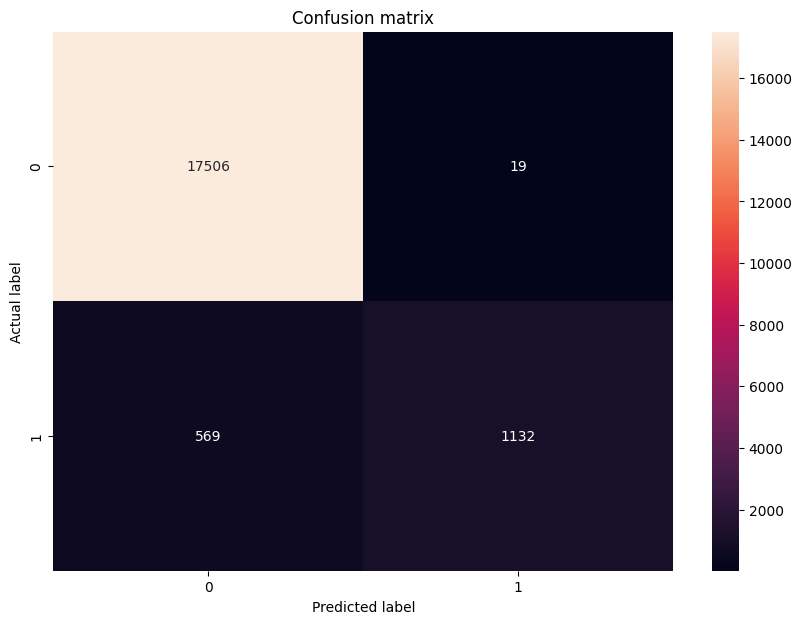

In [335]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm  = confusion_matrix(y_test, y_pred)
    
# Visualize it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

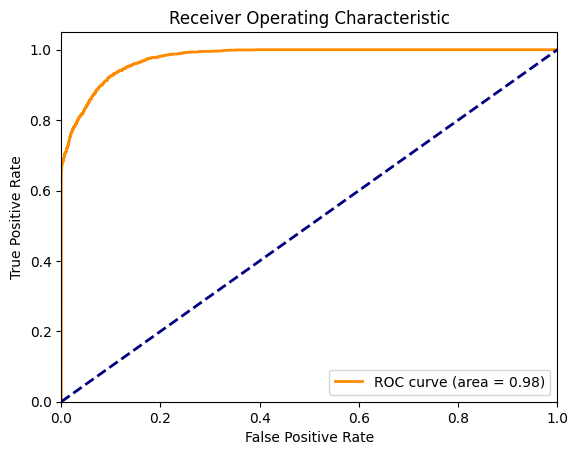

In [339]:
from sklearn.metrics import roc_curve, auc

y_score = best_model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()